In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Step 2: Load the Dataset
# Replace 'vehicle_emission_dataset.csv' with the path to your dataset
df = pd.read_csv("vehicle_emission_dataset.csv")

In [20]:
# Step 3: Explore the Dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Vehicle Type Fuel Type  Engine Size  Age of Vehicle  Mileage       Speed  \
0   Motorcycle  Electric     2.747609              22   291288   49.083255   
1          Bus  Electric     5.743714               3   188398   23.460311   
2          Bus    Hybrid     4.606368              17   281451  115.508351   
3        Truck  Electric     3.913024               4   151321   18.540217   
4        Truck    Hybrid     1.611297              15    91810  109.596566   

   Acceleration Road Type Traffic Conditions  Temperature   Humidity  \
0      1.887738   Highway           Moderate    13.880458  52.883905   
1      3.544147      City              Heavy    19.136947   5.697343   
2      4.646886   Highway          Free flow     8.123428   3.953116   
3      3.581004     Rural              Heavy    35.994893   0.509678   
4      3.879303   Highway           Moderate    14.793481  52.450884   

   Wind Speed  Air Pressure  CO2 Emissions  NOx Emissions  PM2.5 Emis

In [21]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Vehicle Type        10000 non-null  object 
 1   Fuel Type           10000 non-null  object 
 2   Engine Size         10000 non-null  float64
 3   Age of Vehicle      10000 non-null  int64  
 4   Mileage             10000 non-null  int64  
 5   Speed               10000 non-null  float64
 6   Acceleration        10000 non-null  float64
 7   Road Type           10000 non-null  object 
 8   Traffic Conditions  10000 non-null  object 
 9   Temperature         10000 non-null  float64
 10  Humidity            10000 non-null  float64
 11  Wind Speed          10000 non-null  float64
 12  Air Pressure        10000 non-null  float64
 13  CO2 Emissions       10000 non-null  float64
 14  NOx Emissions       10000 non-null  float64
 15  PM2.5 Emissions     10000 non-null  flo

In [22]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Engine Size  Age of Vehicle        Mileage         Speed  \
count  10000.000000    10000.000000   10000.000000  10000.000000   
mean       3.369630       14.490000  148995.708000     59.448818   
std        1.495677        8.584339   87068.385915     34.437175   
min        0.800061        0.000000      56.000000      0.000664   
25%        2.080910        7.000000   73589.750000     29.502708   
50%        3.361149       15.000000  148914.500000     59.701114   
75%        4.648033       22.000000  224359.500000     88.499982   
max        5.998532       29.000000  299863.000000    119.974725   

       Acceleration   Temperature      Humidity    Wind Speed  Air Pressure  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       2.491924     14.935772     50.144758     10.027946   1000.199354   
std        1.446130     14.432900     28.787763      5.735533     28.789590   
min        0.000084     -9.995320      0.000843   

In [23]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Vehicle Type          0
Fuel Type             0
Engine Size           0
Age of Vehicle        0
Mileage               0
Speed                 0
Acceleration          0
Road Type             0
Traffic Conditions    0
Temperature           0
Humidity              0
Wind Speed            0
Air Pressure          0
CO2 Emissions         0
NOx Emissions         0
PM2.5 Emissions       0
VOC Emissions         0
SO2 Emissions         0
Emission Level        0
dtype: int64


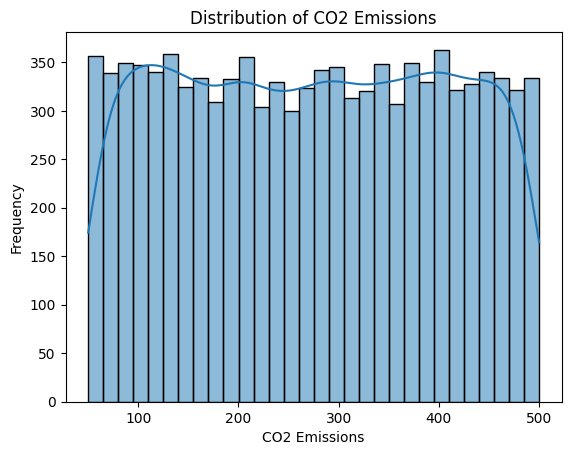

In [24]:
# Visualize distribution of CO2 Emissions (Target Variable)
sns.histplot(df["CO2 Emissions"], kde=True, bins=30)
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

In [26]:
# Step 4: Handle Missing Values
# Fill missing values with column mean for numerical columns
#df.fillna(df.mean(), inplace=True)

In [27]:
# Step 5: Encode Categorical Columns
# Encode categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Vehicle Type', 'Fuel Type', 'Road Type', 'Traffic Conditions']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [28]:
# Step 6: Split the Dataset into Features and Target
X = df.drop(columns=["CO2 Emissions"])  # Features (input variables)
y = df["CO2 Emissions"]                # Target (output variable)


In [29]:
# Step 7: Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Step 8: Encode Categorical Data Properly Before Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=["object"]).columns

# Apply Label Encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Now scale the numeric data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
# Step 9: Train a Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Step 11: Evaluate the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [35]:
# Print Evaluation Metrics
print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared Score (R2): {r2}")


Model Evaluation:
Mean Absolute Error (MAE): 82.27840077252787
Mean Squared Error (MSE): 10215.012073576612
R-Squared Score (R2): 0.3935802764474108


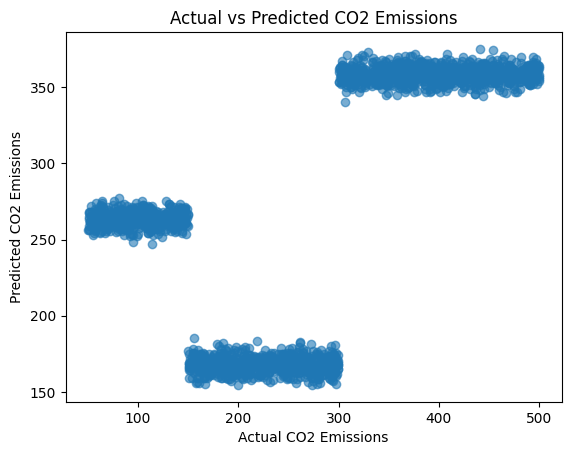

In [36]:
# Step 12: Visualize Results
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title("Actual vs Predicted CO2 Emissions")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.show()

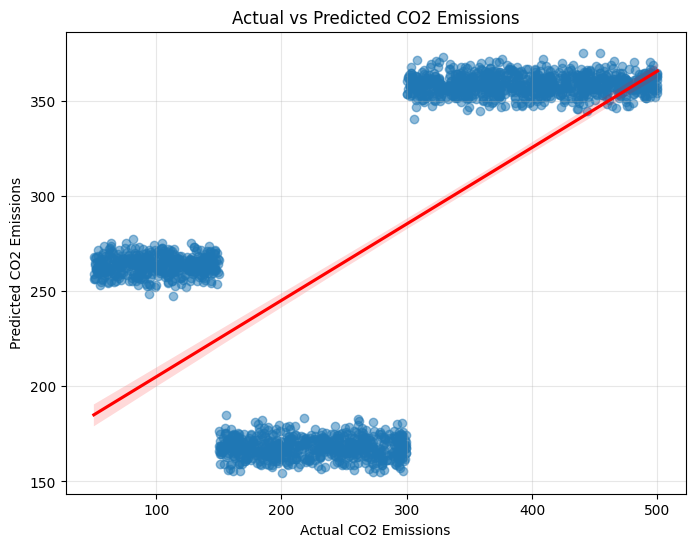

In [41]:
# Scatter plot of Actual vs Predicted with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Actual vs Predicted CO2 Emissions')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.grid(alpha=0.3)
plt.show()
